# Let's train a Nerfie!

**Author**: [Keunhong Park](https://keunhong.com)

[[Project Page](https://nerfies.github.io)]
[[Paper](https://storage.googleapis.com/nerfies-public/videos/nerfies_paper.pdf)]
[[Video](https://www.youtube.com/watch?v=MrKrnHhk8IA)]
[[GitHub](https://github.com/google/nerfies)]

This notebook provides an demo for training Nerfies.

### Instructions

1. Convert a video into our dataset format using the [dataset processing notebook](https://colab.sandbox.google.com/github/google/nerfies/blob/main/notebooks/Nerfies_Capture_Processing.ipynb).
2. Set the `data_dir` below to where you saved the dataset.
3. Come back to this notebook to train a nerfie.


### Notes
 * To accomodate the limited compute power of Colab runtimes, this notebook defaults to a "toy" version of our method. The number of samples have been reduced and the elastic regularization turned off.

 * To train a high-quality model, please look at the CLI options we provide in the [Github repository](https://github.com/google/nerfies).



 * Please report issues on the [GitHub issue tracker](https://github.com/google/nerfies/issues).


If you find this work useful, please consider citing:
```bibtex
@article{park2021nerfies
  author    = {Park, Keunhong 
               and Sinha, Utkarsh 
               and Barron, Jonathan T. 
               and Bouaziz, Sofien 
               and Goldman, Dan B 
               and Seitz, Steven M. 
               and Martin-Brualla, Ricardo},
  title     = {Nerfies: Deformable Neural Radiance Fields},
  journal   = {ICCV},
  year      = {2021},
}
```


## Environment Setup

In [ ]:
!pip install flax immutabledict mediapy
!pip install --upgrade git+https://github.com/google/nerfies@v2

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 23.7 MB/s eta 0:00:00
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Cloning https://github.com/google/nerfies (to revision v2) to /tmp/pip-req-build-zdklytao
  Running command git clone --filter=blob:none --quiet https://github.com/google/nerfies /tmp/pip-req-build-zdklytao
  Running command git checkout -b v2 --track origin/v2
  Switched to a new branch 'v2'
  Branch 'v2' set up to track remote branch 'v2' from 'origin'.
  Resolved https://github.com/google/nerfies to commit 04623e4474bde3459e2f7f2b5c9174d9e0faa7b1
  Preparing metadata (setup.py) ... done
  Created wheel for nerfies: filename=nerfies-0.0.2-py3-none-any.whl size=67944 sha256=b1fa81d8af1d4bec01516a217659e1bb7ad6b062093c839f74a044ac88008f7c
  Stored in directory: /tmp/pip-ephem-wheel-cache-gv5tc3u_/wheels/f5/ca/c8

In [ ]:
pip install flax==0.5.3

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 202.0/202.0 KB 6.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 217.3/217.3 KB 20.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 51.1/51.1 KB 6.1 MB/s eta 0:00:00
  Attempting uninstall: rich
    Found existing installation: rich 13.3.3
    Uninstalling rich-13.3.3:
      Successfully uninstalled rich-13.3.3
  Attempting uninstall: flax
    Found existing installation: flax 0.6.8
    Uninstalling flax-0.6.8:
      Successfully uninstalled flax-0.6.8


In [ ]:
pip install jax==0.4.6

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 19.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for jax: filename=jax-0.4.6-py3-none-any.whl size=1432727 sha256=03fd123872606ebf634fa17634304f385d9d531aae7626960fdd85ffc37fcf81
  Stored in directory: /root/.cache/pip/wheels/68/2c/93/17deec4d117dc0675ed79e8e2af1e62fb1c41ed3955c540de0
Successfully built jax
  Attempting uninstall: jax
    Found existing installation: jax 0.4.7
    Uninstalling jax-0.4.7:
      Successfully uninstalled jax-0.4.7


In [ ]:
pip install jaxlib==0.4.6

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.0/62.0 MB 13.0 MB/s eta 0:00:00
  Attempting uninstall: jaxlib
    Found existing installation: jaxlib 0.4.7+cuda11.cudnn86
    Uninstalling jaxlib-0.4.7+cuda11.cudnn86:
      Successfully uninstalled jaxlib-0.4.7+cuda11.cudnn86


In [ ]:
import jax

In [ ]:
# @title Configure notebook runtime
# @markdown If you would like to use a GPU runtime instead, change the runtime type by going to `Runtime > Change runtime type`. 
# @markdown You will have to use a smaller batch size on GPU.

runtime_type = 'gpu'  # @param ['gpu', 'tpu']
if runtime_type == 'tpu':
  import jax.tools.colab_tpu
  jax.tools.colab_tpu.setup_tpu()

print('Detected Devices:', jax.devices())

Detected Devices: [CpuDevice(id=0)]


In [ ]:
# @title Mount Google Drive
# @markdown Mount Google Drive onto `/content/gdrive`. You can skip this if running locally.

from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
!python --version

Python 3.9.16


In [ ]:
pip list

Package                       Version
----------------------------- ------------
absl-py                       1.4.0
alabaster                     0.7.13
albumentations                1.2.1
altair                        4.2.2
appdirs                       1.4.4
argon2-cffi                   21.3.0
argon2-cffi-bindings          21.2.0
arviz                         0.15.1
astropy                       5.2.1
astunparse                    1.6.3
attrs                         22.2.0
audioread                     3.0.0
autograd                      1.5
Babel                         2.12.1
backcall                      0.2.0
beautifulsoup4                4.11.2
bleach                        6.0.0
blis                          0.7.9
bokeh                         2.4.3
branca                        0.6.0
CacheControl                  0.12.11
cached-property               1.5.2
cachetools                    5.3.0
catalogue                     2.0.8
certifi                       2022.12.7
cffi    

In [ ]:
# @title Define imports and utility functions.

import jax
from jax.config import config as jax_config
import jax.numpy as jnp
from jax import grad, jit, vmap
from jax import random

import flax
import flax.linen as nn
from flax import jax_utils
from flax import optim
# import optax
from flax.metrics import tensorboard
from flax.training import checkpoints
# jax_config.enable_omnistaging() # Linen requires enabling omnistaging

from absl import logging
from io import BytesIO
import random as pyrandom
import numpy as np
import PIL
import IPython


# Monkey patch logging.
def myprint(msg, *args, **kwargs):
 print(msg % args)

logging.info = myprint 
logging.warn = myprint
logging.error = myprint


def show_image(image, fmt='png'):
    image = image_utils.image_to_uint8(image)
    f = BytesIO()
    PIL.Image.fromarray(image).save(f, fmt)
    IPython.display.display(IPython.display.Image(data=f.getvalue()))



/usr/local/lib/python3.9/dist-packages/flax/struct.py:132: FutureWarning: jax.tree_util.register_keypaths is deprecated, and will be removed in a future release. Please use `register_pytree_with_keys()` instead.
  jax.tree_util.register_keypaths(data_clz, keypaths)
/usr/local/lib/python3.9/dist-packages/flax/struct.py:132: FutureWarning: jax.tree_util.register_keypaths is deprecated, and will be removed in a future release. Please use `register_pytree_with_keys()` instead.
  jax.tree_util.register_keypaths(data_clz, keypaths)


In [ ]:
pip show flax

Name: flax
Version: 0.5.3
Summary: Flax: A neural network library for JAX designed for flexibility
Home-page: https://github.com/google/flax
Author: Flax team
Author-email: flax-dev@google.com
License: UNKNOWN
Location: /usr/local/lib/python3.9/dist-packages
Requires: jax, matplotlib, msgpack, numpy, optax, PyYAML, rich, tensorstore, typing-extensions
Required-by: dopamine-rl


In [ ]:
pip show jax

Name: jax
Version: 0.4.6
Summary: Differentiate, compile, and transform Numpy code.
Home-page: https://github.com/google/jax
Author: JAX team
Author-email: jax-dev@google.com
License: Apache-2.0
Location: /usr/local/lib/python3.9/dist-packages
Requires: numpy, opt-einsum, scipy
Required-by: chex, dopamine-rl, flax, optax, orbax, tensorflow


In [ ]:
!python --version

Python 3.9.16


## Configuration

In [ ]:
pip show jaxlib

Name: jaxlib
Version: 0.4.6
Summary: XLA library for JAX
Home-page: https://github.com/google/jax
Author: JAX team
Author-email: jax-dev@google.com
License: Apache-2.0
Location: /usr/local/lib/python3.9/dist-packages
Requires: numpy, scipy
Required-by: chex, dopamine-rl, optax, orbax


In [ ]:
from nerfies import configs

In [ ]:
dir(configs)

['Any',
 'EvalConfig',
 'ExperimentConfig',
 'Mapping',
 'ModelConfig',
 'Optional',
 'ScheduleDef',
 'TrainConfig',
 'Tuple',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__spec__',
 'dataclasses',
 'gin',
 'immutabledict',
 'nn',
 'types']

In [ ]:
# @title Model and dataset configuration

from pathlib import Path
from pprint import pprint
import gin
from IPython.display import display, Markdown

from nerfies import configs


# @markdown The working directory.
train_dir = '/content/gdrive/MyDrive/nerfies_1/experiments/capture1/exp1'  # @param {type: "string"}
# @markdown The directory to the dataset capture.
data_dir = '/content/gdrive/MyDrive/nerfies_1/captures/capture1'  # @param {type: "string"}

# @markdown Training configuration.
max_steps = 100000  # @param {type: 'number'}
batch_size = 32  # @param {type: 'number'}
image_scale = 8  # @param {type: 'number'}

# @markdown Model configuration.
use_viewdirs = True  #@param {type: 'boolean'}
use_appearance_metadata = True  #@param {type: 'boolean'}
warp_field_type = 'se3'  #@param['se3', 'translation']
num_warp_freqs = 8  #@param{type:'number'}
num_coarse_samples = 64  # @param {type: 'number'}
num_fine_samples = 64  # @param {type: 'number'}

checkpoint_dir = Path(train_dir, 'checkpoints')
checkpoint_dir.mkdir(exist_ok=True, parents=True)

config_str = f"""
ExperimentConfig.image_scale = {image_scale}
ExperimentConfig.datasource_spec = {{
    'type': 'nerfies',
    'data_dir': '{data_dir}',
    'camera_type': 'json',
}}

ModelConfig.use_warp = True
ModelConfig.use_viewdirs = {int(use_viewdirs)}
ModelConfig.use_appearance_metadata = {int(use_appearance_metadata)}
ModelConfig.warp_field_type = 'se3'
ModelConfig.num_warp_freqs = {num_warp_freqs}
ModelConfig.num_coarse_samples = {num_coarse_samples}
ModelConfig.num_fine_samples = {num_fine_samples}

TrainConfig.max_steps = {max_steps}
TrainConfig.batch_size = {batch_size}
TrainConfig.print_every = 100
TrainConfig.use_elastic_loss = False
TrainConfig.use_background_loss = False
TrainConfig.warp_alpha_schedule = {{
    'type': 'linear',
    'initial_value': 0.0,
    'final_value': {num_warp_freqs},
    'num_steps': {int(max_steps*0.8)},
}}
"""

gin.parse_config(config_str)

config_path = Path(train_dir, 'config.gin')
with open(config_path, 'w') as f:
  logging.info('Saving config to %s', config_path)
  f.write(config_str)

exp_config = configs.ExperimentConfig()
model_config = configs.ModelConfig()
train_config = configs.TrainConfig()
eval_config = configs.EvalConfig()

display(Markdown(
    gin.config.markdown(gin.operative_config_str())))

Saving config to /content/gdrive/MyDrive/nerfies_1/experiments/capture1/exp1/config.gin


#### Parameters for EvalConfig:

    EvalConfig.chunk = 8192
    EvalConfig.eval_once = False
    EvalConfig.num_test_eval = 10
    EvalConfig.num_train_eval = 10
    EvalConfig.num_val_eval = 10
    EvalConfig.save_output = True
    
#### Parameters for ExperimentConfig:

    ExperimentConfig.datasource_spec = \
        {'camera_type': 'json',
         'data_dir': '/content/gdrive/MyDrive/nerfies_1/captures/capture1',
         'type': 'nerfies'}
    ExperimentConfig.datasource_type = 'nerfies'
    ExperimentConfig.image_scale = 8
    ExperimentConfig.random_seed = 12345
    ExperimentConfig.subname = None
    
#### Parameters for ModelConfig:

    ModelConfig.alpha_channels = 1
    ModelConfig.appearance_metadata_dims = 8
    ModelConfig.camera_metadata_dims = 2
    ModelConfig.nerf_rgb_branch_depth = 1
    ModelConfig.nerf_rgb_branch_width = 128
    ModelConfig.nerf_skips = (4,)
    ModelConfig.nerf_trunk_depth = 8
    ModelConfig.nerf_trunk_width = 256
    ModelConfig.noise_std = None
    ModelConfig.num_coarse_samples = 64
    ModelConfig.num_fine_samples = 64
    ModelConfig.num_nerf_point_freqs = 10
    ModelConfig.num_nerf_viewdir_freqs = 4
    ModelConfig.num_warp_features = 8
    ModelConfig.num_warp_freqs = 8
    ModelConfig.rgb_channels = 3
    ModelConfig.use_alpha_condition = False
    ModelConfig.use_appearance_metadata = 1
    ModelConfig.use_camera_metadata = False
    ModelConfig.use_linear_disparity = False
    ModelConfig.use_rgb_condition = False
    ModelConfig.use_sample_at_infinity = True
    ModelConfig.use_stratified_sampling = True
    ModelConfig.use_trunk_condition = False
    ModelConfig.use_viewdirs = 1
    ModelConfig.use_warp = True
    ModelConfig.use_white_background = False
    ModelConfig.warp_field_type = 'se3'
    ModelConfig.warp_metadata_encoder_type = 'glo'
    
#### Parameters for TrainConfig:

    TrainConfig.background_loss_weight = 0.0
    TrainConfig.background_points_batch_size = 16384
    TrainConfig.batch_size = 32
    TrainConfig.elastic_loss_type = 'log_svals'
    TrainConfig.elastic_loss_weight_schedule = ('constant', 0.0)
    TrainConfig.elastic_reduce_method = 'weight'
    TrainConfig.histogram_every = 5000
    TrainConfig.log_every = 500
    TrainConfig.max_steps = 100000
    TrainConfig.print_every = 100
    TrainConfig.save_every = 10000
    TrainConfig.shuffle_buffer_size = 5000000
    TrainConfig.time_alpha_schedule = ('constant', 0.0)
    TrainConfig.use_background_loss = False
    TrainConfig.use_elastic_loss = False
    TrainConfig.use_warp_reg_loss = False
    TrainConfig.warp_alpha_schedule = \
        {'final_value': 8,
         'initial_value': 0.0,
         'num_steps': 80000,
         'type': 'linear'}
    TrainConfig.warp_reg_loss_alpha = -2.0
    TrainConfig.warp_reg_loss_scale = 0.001
    TrainConfig.warp_reg_loss_weight = 0.0

*** Loading dataset IDs from /content/gdrive/MyDrive/nerfies_1/captures/capture1/dataset.json
Creating datasource of type NerfiesDataSource with use_appearance_id=1, use_camera_id=False, use_warp_id=True, use_depth=False, use_time=False


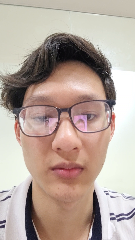

In [ ]:
# @title Create datasource and show an example.

from nerfies import datasets
from nerfies import image_utils

datasource = datasets.from_config(
  exp_config.datasource_spec,
  image_scale=exp_config.image_scale,
  use_appearance_id=model_config.use_appearance_metadata,
  use_camera_id=model_config.use_camera_metadata,
  use_warp_id=model_config.use_warp,

  random_seed=exp_config.random_seed)

show_image(datasource.load_rgb(datasource.train_ids[0]))

In [ ]:
import jax

In [ ]:

# @title Create training iterators

devices = jax.local_devices()

train_iter = datasource.create_iterator(
    datasource.train_ids,
    batch_size=train_config.batch_size,
    flatten=True,
    shuffle=True,
    prefetch_size=3,
    devices=devices)

def shuffled(l):
  import random as r
  import copy
  l = copy.copy(l)
  r.shuffle(l)
  return l

train_eval_iter = datasource.create_iterator(
    shuffled(datasource.train_ids), batch_size=0, devices=devices)
val_eval_iter = datasource.create_iterator(
    shuffled(datasource.val_ids), batch_size=0, devices=devices)

	Loaded item 000006: shape=(240, 135, 3), scale_factor=1.000000, metadata={'appearance': 1, 'warp': 1}
	Loaded item 000005: shape=(240, 135, 3), scale_factor=1.000000, metadata={'appearance': 0, 'warp': 0}
	Loaded item 000007: shape=(240, 135, 3), scale_factor=1.000000, metadata={'appearance': 2, 'warp': 2}
	Loaded item 000012: shape=(240, 135, 3), scale_factor=1.000000, metadata={'appearance': 7, 'warp': 7}
	Loaded item 000008: shape=(240, 135, 3), scale_factor=1.000000, metadata={'appearance': 3, 'warp': 3}
	Loaded item 000010: shape=(240, 135, 3), scale_factor=1.000000, metadata={'appearance': 5, 'warp': 5}
	Loaded item 000013: shape=(240, 135, 3), scale_factor=1.000000, metadata={'appearance': 8, 'warp': 8}
	Loaded item 000009: shape=(240, 135, 3), scale_factor=1.000000, metadata={'appearance': 4, 'warp': 4}
	Loaded item 000014: shape=(240, 135, 3), scale_factor=1.000000, metadata={'appearance': 9, 'warp': 9}
	Loaded item 000011: shape=(240, 135, 3), scale_factor=1.000000, metadata

In [ ]:
dir(jax.tree_util)

['AttributeKeyPathEntry',
 'DictKey',
 'FlattenedIndexKey',
 'GetAttrKey',
 'GetitemKeyPathEntry',
 'Partial',
 'PyTreeDef',
 'SequenceKey',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__spec__',
 'all_leaves',
 'build_tree',
 'keystr',
 'register_keypaths',
 'register_pytree_node',
 'register_pytree_node_class',
 'register_pytree_with_keys',
 'register_pytree_with_keys_class',
 'tree_all',
 'tree_flatten',
 'tree_flatten_with_path',
 'tree_leaves',
 'tree_map',
 'tree_map_with_path',
 'tree_reduce',
 'tree_structure',
 'tree_transpose',
 'tree_unflatten',
 'treedef_children',
 'treedef_is_leaf',
 'treedef_tuple']

In [ ]:
!pip show jax

Name: jax
Version: 0.4.6
Summary: Differentiate, compile, and transform Numpy code.
Home-page: https://github.com/google/jax
Author: JAX team
Author-email: jax-dev@google.com
License: Apache-2.0
Location: /usr/local/lib/python3.9/dist-packages
Requires: numpy, opt-einsum, scipy
Required-by: chex, dopamine-rl, flax, optax, orbax


In [ ]:
pip list

In [ ]:
import jax.tree_util as tree_util

In [ ]:
tmp_tree = tree_util.tree_map(lambda x: x + 1, {"x" : 7, "y" : 42})

In [ ]:
print(tmp_tree)

{'x': 8, 'y': 43}


In [ ]:
pip show jax

Name: jax
Version: 0.4.6
Summary: Differentiate, compile, and transform Numpy code.
Home-page: https://github.com/google/jax
Author: JAX team
Author-email: jax-dev@google.com
License: Apache-2.0
Location: /usr/local/lib/python3.9/dist-packages
Requires: numpy, opt-einsum, scipy
Required-by: chex, dopamine-rl, flax, optax, orbax


## Training

In [ ]:
# @title Initialize model
# @markdown Defines the model and initializes its parameters.

from flax.training import checkpoints
from nerfies import models
from nerfies import model_utils
from nerfies import schedules
from nerfies import training

# @markdown Restore a checkpoint if one exists.
restore_checkpoint = True  # @param{type:'boolean'}


rng = random.PRNGKey(exp_config.random_seed)
np.random.seed(exp_config.random_seed + jax.process_index())
devices_to_use = jax.devices()

learning_rate_sched = schedules.from_config(train_config.lr_schedule)
warp_alpha_sched = schedules.from_config(train_config.warp_alpha_schedule)
elastic_loss_weight_sched = schedules.from_config(
    train_config.elastic_loss_weight_schedule)

rng, key = random.split(rng)
params = {}
model, params['model'] = models.construct_nerf(
    key,
    model_config,
    batch_size=train_config.batch_size,
    appearance_ids=datasource.appearance_ids,
    camera_ids=datasource.camera_ids,
    warp_ids=datasource.warp_ids,
    near=datasource.near,
    far=datasource.far,
    use_warp_jacobian=train_config.use_elastic_loss,
    use_weights=train_config.use_elastic_loss)

optimizer_def = optim.Adam(learning_rate_sched(0))
optimizer = optimizer_def.create(params)
state = model_utils.TrainState(
    optimizer=optimizer,
    warp_alpha=warp_alpha_sched(0))
scalar_params = training.ScalarParams(
    learning_rate=learning_rate_sched(0),
    elastic_loss_weight=elastic_loss_weight_sched(0),
    warp_reg_loss_weight=train_config.warp_reg_loss_weight,
    warp_reg_loss_alpha=train_config.warp_reg_loss_alpha,
    warp_reg_loss_scale=train_config.warp_reg_loss_scale,
    background_loss_weight=train_config.background_loss_weight)
if restore_checkpoint:
  logging.info('Restoring checkpoint from %s', checkpoint_dir)
  state = checkpoints.restore_checkpoint(checkpoint_dir, state)
step = state.optimizer.state.step + 1
state = jax_utils.replicate(state, devices=devices)
del params

/usr/local/lib/python3.9/dist-packages/flax/struct.py:132: FutureWarning: jax.tree_util.register_keypaths is deprecated, and will be removed in a future release. Please use `register_pytree_with_keys()` instead.
  jax.tree_util.register_keypaths(data_clz, keypaths)
/usr/local/lib/python3.9/dist-packages/flax/core/lift.py:112: FutureWarning: jax.tree_flatten is deprecated, and will be removed in a future release. Use jax.tree_util.tree_flatten instead.
  scopes, treedef = jax.tree_flatten(scope_tree)
/usr/local/lib/python3.9/dist-packages/flax/core/lift.py:585: FutureWarning: jax.tree_leaves is deprecated, and will be removed in a future release. Use jax.tree_util.tree_leaves instead.
  leaves = jax.tree_leaves(x)
/usr/local/lib/python3.9/dist-packages/flax/core/lift.py:594: FutureWarning: jax.tree_leaves is deprecated, and will be removed in a future release. Use jax.tree_util.tree_leaves instead.
  axis_sizes = set(jax.tree_leaves(axis_sizes))
/usr/local/lib/python3.9/dist-packages/fl

Restoring checkpoint from /content/gdrive/MyDrive/nerfies_1/experiments/capture1/exp1/checkpoints
Found no checkpoint files in /content/gdrive/MyDrive/nerfies_1/experiments/capture1/exp1/checkpoints with prefix checkpoint_


In [ ]:
import jax.numpy
import numpy
arrays = [numpy.random.random((4,2)) for _ in range(3)]

In [ ]:
arrays = numpy.array(arrays)
# numpy.mean(arrays, axis=0) 
jax.numpy.mean(arrays, axis=0)

Array([[0.82944506, 0.6140405 ],
       [0.6320938 , 0.6298508 ],
       [0.4061962 , 0.47314757],
       [0.5769391 , 0.54505765]], dtype=float32)

In [ ]:
nano 
'/usr/local/lib/python3.9/dist-packages/nerfies/model_utils.py'

NameError: ignored

In [ ]:
a = [[1, 2, 3, 4], 
     [5, 6, 7, 8],
     [9, 10, 11, 12]]

In [ ]:
dir()

In [ ]:
pip show flax

Name: flax
Version: 0.5.3
Summary: Flax: A neural network library for JAX designed for flexibility
Home-page: https://github.com/google/flax
Author: Flax team
Author-email: flax-dev@google.com
License: UNKNOWN
Location: /usr/local/lib/python3.9/dist-packages
Requires: jax, matplotlib, msgpack, numpy, optax, PyYAML, rich, tensorstore, typing-extensions
Required-by: dopamine-rl


In [ ]:
# @title Define pmapped functions
# @markdown This parallelizes the training and evaluation step functions using `jax.pmap`.

import functools
from nerfies import evaluation


def _model_fn(key_0, key_1, params, rays_dict, warp_extra):
  out = model.apply({'params': params},
                    rays_dict,
                    warp_extra=warp_extra,
                    rngs={
                        'coarse': key_0,
                        'fine': key_1
                    },
                    mutable=False)
  return jax.lax.all_gather(out, axis_name='batch')

pmodel_fn = jax.pmap(
    # Note rng_keys are useless in eval mode since there's no randomness.
    _model_fn,
    in_axes=(0, 0, 0, 0, 0),  # Only distribute the data input.
    devices=devices_to_use,
    donate_argnums=(3,),  # Donate the 'rays' argument.
    axis_name='batch',
)

render_fn = functools.partial(evaluation.render_image,
                              model_fn=pmodel_fn,
                              device_count=len(devices),
                              chunk=eval_config.chunk)
train_step = functools.partial(
    training.train_step,
    model,
    elastic_reduce_method=train_config.elastic_reduce_method,
    elastic_loss_type=train_config.elastic_loss_type,
    use_elastic_loss=train_config.use_elastic_loss,
    use_background_loss=train_config.use_background_loss,
    use_warp_reg_loss=train_config.use_warp_reg_loss,
)
ptrain_step = jax.pmap(
    train_step,
    axis_name='batch',
    devices=devices,
    # rng_key, state, batch, scalar_params.
    in_axes=(0, 0, 0, None),
    # Treat use_elastic_loss as compile-time static.
    donate_argnums=(2,),  # Donate the 'batch' argument.
)

In [ ]:
# @title Train a Nerfie!
# @markdown This runs the training loop!

import mediapy
from nerfies import utils
from nerfies import visualization as viz


print_every_n_iterations = 100  # @param{type:'number'}
visualize_results_every_n_iterations = 500  # @param{type:'number'}
save_checkpoint_every_n_iterations = 1000  # @param{type:'number'}


logging.info('Starting training')
rng = rng + jax.process_index()  # Make random seed separate across hosts.
keys = random.split(rng, len(devices))
time_tracker = utils.TimeTracker()
time_tracker.tic('data', 'total')

for step, batch in zip(range(step, train_config.max_steps + 1), train_iter):
  time_tracker.toc('data')
  scalar_params = scalar_params.replace(
      learning_rate=learning_rate_sched(step),
      elastic_loss_weight=elastic_loss_weight_sched(step))
  warp_alpha = jax_utils.replicate(warp_alpha_sched(step), devices)
  state = state.replace(warp_alpha=warp_alpha)

  with time_tracker.record_time('train_step'):
    state, stats, keys = ptrain_step(keys, state, batch, scalar_params)
    time_tracker.toc('total')

  if step % print_every_n_iterations == 0:
    logging.info(
        'step=%d, warp_alpha=%.04f, %s',
        step, warp_alpha_sched(step), time_tracker.summary_str('last'))
    coarse_metrics_str = ', '.join(
        [f'{k}={v.mean():.04f}' for k, v in stats['coarse'].items()])
    fine_metrics_str = ', '.join(
        [f'{k}={v.mean():.04f}' for k, v in stats['fine'].items()])
    logging.info('\tcoarse metrics: %s', coarse_metrics_str)
    if 'fine' in stats:
      logging.info('\tfine metrics: %s', fine_metrics_str)
  
  if step % visualize_results_every_n_iterations == 0:
    print(f'[step={step}] Training set visualization')
    eval_batch = next(train_eval_iter)
    render = render_fn(state, eval_batch, rng=rng)
    rgb = render['rgb']
    acc = render['acc']
    depth_exp = render['depth']
    depth_med = render['med_depth']
    rgb_target = eval_batch['rgb']
    depth_med_viz = viz.colorize(depth_med, cmin=datasource.near, cmax=datasource.far)
    mediapy.show_images([rgb_target, rgb, depth_med_viz],
                        titles=['GT RGB', 'Pred RGB', 'Pred Depth'])

    print(f'[step={step}] Validation set visualization')
    eval_batch = next(val_eval_iter)
    render = render_fn(state, eval_batch, rng=rng)
    rgb = render['rgb']
    acc = render['acc']
    depth_exp = render['depth']
    depth_med = render['med_depth']
    rgb_target = eval_batch['rgb']
    depth_med_viz = viz.colorize(depth_med, cmin=datasource.near, cmax=datasource.far)
    mediapy.show_images([rgb_target, rgb, depth_med_viz],
                       titles=['GT RGB', 'Pred RGB', 'Pred Depth'])

  if step % save_checkpoint_every_n_iterations == 0:
    training.save_checkpoint(checkpoint_dir, state)

  time_tracker.tic('data', 'total')


In [ ]:
pip show jax

Name: jax
Version: 0.4.6
Summary: Differentiate, compile, and transform Numpy code.
Home-page: https://github.com/google/jax
Author: JAX team
Author-email: jax-dev@google.com
License: Apache-2.0
Location: /usr/local/lib/python3.9/dist-packages
Requires: numpy, opt-einsum, scipy
Required-by: chex, dopamine-rl, flax, optax, orbax
